<a href="https://colab.research.google.com/github/uttarabahad/hello-world/blob/master/Uttara_Bahad_Task_2_IRIS_DATA_PREDICTION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**TASK #2**

PREDICTION USING UNSUPERVISED ML

**Aim:** From the given ‘Iris’ dataset, predict the optimum number of clusters
and represent it visually.

**1] EXPLORING THE IRIS DATASET**

In [1]:
#Importing Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Reading the dataset and displaying the top 5 values of the dataset
iris = pd.read_csv("Iris.csv")
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
#Checking Number of Rows and Columns from the dataset
iris.shape

(150, 6)

**2] CHECKING FOR NULL VALUES IF PRESENT**

In [4]:
iris.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

Hence, No Null Values are present.

**3] VISUALIZING THE ORIGINAL DATA TO SEE THE RELATIONS BETWEEN PARAMETERS**

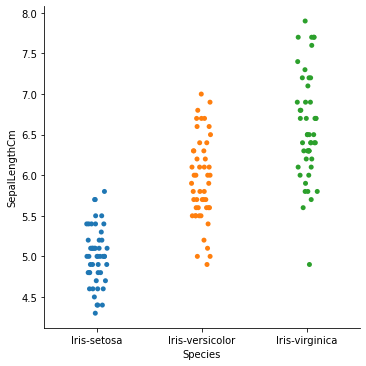

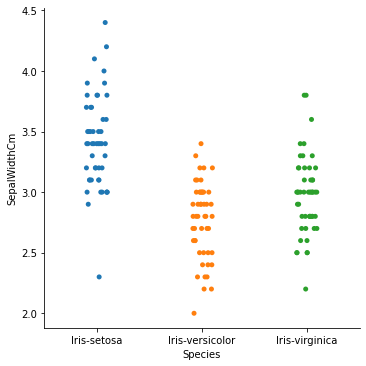

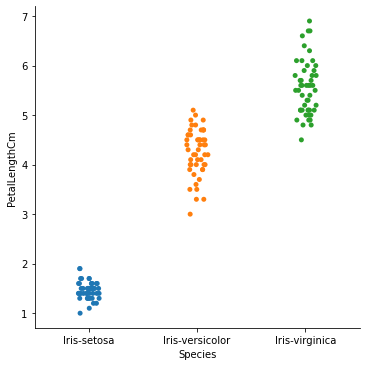

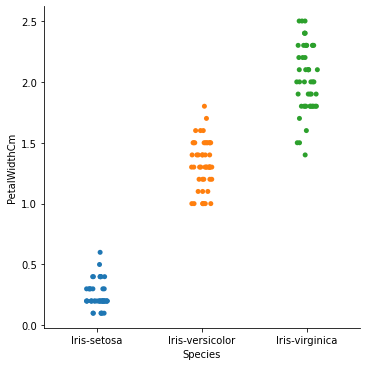

In [25]:
sns.catplot(x='Species',y='SepalLengthCm',data=iris)
sns.catplot(x='Species',y='SepalWidthCm',data=iris)
sns.catplot(x='Species',y='PetalLengthCm',data=iris)
sns.catplot(x='Species',y='PetalWidthCm',data=iris)
plt.show()

**4] Using KMeans Clustering**

In [36]:
from sklearn.cluster import KMeans
ic = []
for i in range(1,10):
    kmeans = KMeans( n_jobs=-1,n_clusters = i, init='k-means++')
    kmeans.fit(iris.iloc[:,[0,1,2,3]])
    ic.append(kmeans.inertia_)

**5] Elbow Method to know the number of Optimum Clusters**

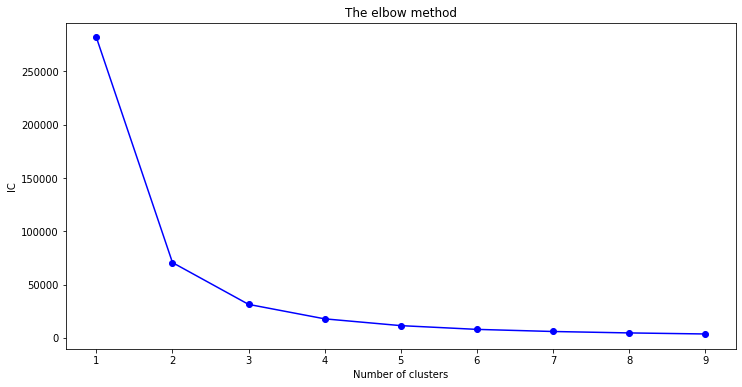

In [37]:
df = pd.DataFrame({'Cluster':range(1,10), 'ic':ic})
plt.figure(figsize=(12,6))
plt.plot(df['Cluster'], df['ic'], marker='o',color='blue')
plt.xlabel('Number of clusters')
plt.ylabel('IC')#In cluster range
plt.title('The elbow method')
plt.show()

**Looking at the result obtained from the elbow method,we can conclude that the number of optimum clusters is 3.**

**6] Visualization of Clusters**

In [15]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++')
y_kmeans = kmeans.fit_predict(iris.iloc[:, [0, 1, 2, 3]].values)

**6.1] Visualizing Centroids on the Clusters of Columns SepalLength and SepalWidth**

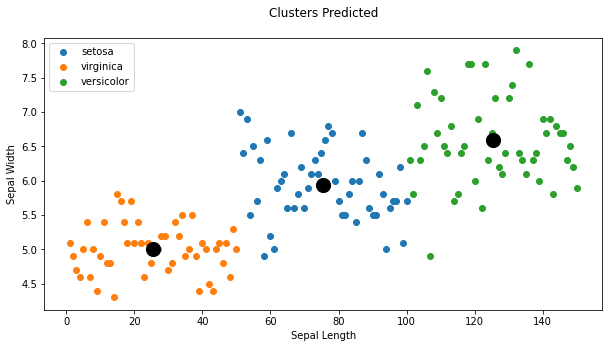

In [19]:
x = iris.iloc[:, [0, 1, 2, 3]].values
plt.figure(figsize=(10,5))
plt.scatter(x[y_kmeans==0,0],x[y_kmeans==0,1],label='setosa')
plt.scatter(x[y_kmeans==1,0],x[y_kmeans==1,1],label='virginica')
plt.scatter(x[y_kmeans==2,0],x[y_kmeans==2,1],label='versicolor')
plt.legend()
plt.title('Clusters Predicted\n')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1] ,  s=200, c='black', label = 'Centroids')
plt.show()

**6.1] Visualizing Centroids on the Clusters of Columns PetalLength and PetalWidth**

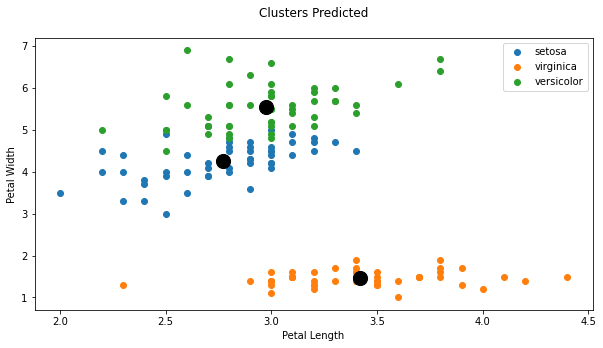

In [21]:
plt.figure(figsize=(10,5))
plt.scatter(x[y_kmeans==0,2],x[y_kmeans==0,3],label='setosa')
plt.scatter(x[y_kmeans==1,2],x[y_kmeans==1,3],label='virginica')
plt.scatter(x[y_kmeans==2,2],x[y_kmeans==2,3],label='versicolor')
plt.legend()
plt.title('Clusters Predicted\n')
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.scatter(kmeans.cluster_centers_[:, 2], kmeans.cluster_centers_[:, 3] ,  s=200, c='black', label = 'Centroids')
plt.show()

**Conclusion:** Hence we have found that there are 3 optimum clusters and have visualized them using centroids above.